In [152]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import division, I think I had an issue running this with python 2. This makes divide sign work properly
#I have upgraded to python 3, but this is still run as python 2.Let me know if this causes an issue for you.
from __future__ import division

In [153]:
#import the unkwown wine file, as well as the wine dataset from sklearn
infile = 'unknown_wine.csv'
unknownwine = pd.read_csv(infile,sep=(','))
from sklearn.datasets import load_wine
wine = load_wine()
wine.target
targetnamelist = list(wine.target_names)
targetnamelist

['class_0', 'class_1', 'class_2']

In [154]:
# Feature matrix in a object named X
X = wine.data
# response vector in a object named y
y = wine.target
#print the shape of X and Y
print(np.shape(X))
print(np.shape(y))

(178, 13)
(178,)


In [155]:
#import the splitter (train/test) and the scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
#Scale the data to normalise
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
#check the shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [157]:
#import classifier
from sklearn.neural_network import MLPClassifier

#import metrics model to check the accuracy 
from sklearn import metrics

#initialize lists, goodfit saves node, layer count and accuracy, goodfitMATRIX saves the confusion matrix for
#those that have accuracy above 0.9
#results saves the nodes/layers/score for all models
#layers is fed to the classifier, and is changed during each for and while loop
goodfit = []
goodfitMATRIX = []
results = []
layers = []
count_layer = 1
first =0

for x in range(5):
    while count_layer <6:
        #append to the layer list ex. [1],[1,1]... then as x increases
        #ex. [2],[2,2]...
        layers.append(x+1)
        #print layers
        mlp = MLPClassifier(hidden_layer_sizes=layers,max_iter=10000,random_state = 4)
        mlp.fit(X_train,y_train)
        predictions = mlp.predict(X_test)
        accresults = metrics.accuracy_score(y_test,predictions)
        res = [x+1,count_layer,accresults]
        confmat = metrics.confusion_matrix(y_test, predictions)
        #print confmat
        if accresults >= 0.9:
            goodfit.append(res)
            goodfitMATRIX.append(confmat)
            #print confmat
            TpA = confmat[0,0]
            TpB = confmat[1,1]
            TpC = confmat[2,2]
            TnA = confmat[1,1]+confmat[2,2]
            TnB = confmat[0,0]+confmat[2,2]
            TnC = confmat[0,0]+confmat[1,1]
            PredA = sum(confmat[:,0])
            PredB = sum(confmat[:,1])
            PredC = sum(confmat[:,2])
            FnA = sum(confmat[0,:])
            FnB = sum(confmat[1,:])
            FnC = sum(confmat[2,:])
            PrecisionA = TpA / PredA
            PrecisionB = TpB / PredB
            PrecisionC = TpC / PredC
            RecallA = TpB / FnB
            RecallB = TpB / FnB
            RecallC = TpC / FnC
            AccuracyA = np.add(TpA,TnA) / (PredA+PredB+PredC)
            AccuracyB = np.add(TpB,TnB) / (PredA+PredB+PredC)
            AccuracyC = np.add(TpC,TnC) / (PredA+PredB+PredC)
            FmeasureA = (2*RecallA*PrecisionA) / np.add(RecallA,PrecisionA)
            FmeasureB = (2*RecallB*PrecisionB) / np.add(RecallB,PrecisionB)
            FmeasureC = (2*RecallC*PrecisionC) / np.add(RecallC,PrecisionC)
            print ('This model was above 0.9 accuracy\n')
            print ('nodes,layers,accuracy')
            print res
            print ('\nClass\tPrecision\tRecall\tFmeasure')
            print ('0\t%s\t%s\t%s' % (PrecisionA,RecallA,FmeasureA))
            print ('1\t%s\t%s\t%s' % (PrecisionB,RecallB,FmeasureB))
            print ('2\t%s\t%s\t%s\n' % (PrecisionC,RecallC,FmeasureC))
            print metrics.classification_report(y_test, predictions)
            
            #Because while testing I've seen that several are perfect fits
            #I'm adding an if statement to test the first perfect fit I get on the unknown data        
            
            if AccuracyA==1 and AccuracyB and AccuracyC and first ==0:
                bestx= metrics.classification_report(y_test, predictions)
                bestowncalcs = [[PrecisionA,RecallA,FmeasureA],[PrecisionB,RecallB,FmeasureB],[PrecisionC,RecallC,FmeasureC]]
                unkprediction = mlp.predict(unknownwine)
                classprediction = []
                bestfit = res[0:2]
                bestconf= confmat
                for i in unkprediction:
                    tname = targetnamelist[i]
                    classprediction.append(tname)
                prob = mlp.predict_proba(unknownwine)
                first =1
        results.append(res)
        count_layer = count_layer+1
        
    count_layer = 1
    layers = []
#print results
#results

This model was above 0.9 accuracy

nodes,layers,accuracy
[2, 1, 0.9722222222222222]

Class	Precision	Recall	Fmeasure
0	1.0	1.0	1.0
1	0.9285714285714286	1.0	0.962962962962963
2	1.0	0.9230769230769231	0.9600000000000001

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

   micro avg       0.97      0.97      0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

This model was above 0.9 accuracy

nodes,layers,accuracy
[2, 2, 1.0]

Class	Precision	Recall	Fmeasure
0	1.0	1.0	1.0
1	1.0	1.0	1.0
2	1.0	1.0	1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00    

This model was above 0.9 accuracy

nodes,layers,accuracy
[5, 3, 0.9722222222222222]

Class	Precision	Recall	Fmeasure
0	1.0	1.0	1.0
1	0.9285714285714286	1.0	0.962962962962963
2	1.0	0.9230769230769231	0.9600000000000001

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

   micro avg       0.97      0.97      0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

This model was above 0.9 accuracy

nodes,layers,accuracy
[5, 4, 0.9722222222222222]

Class	Precision	Recall	Fmeasure
0	1.0	1.0	1.0
1	0.9285714285714286	1.0	0.962962962962963
2	1.0	0.9230769230769231	0.9600000000000001

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2      

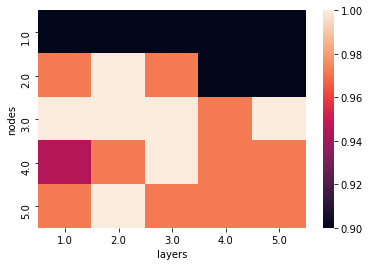

In [158]:
#make results list into an array for plotting
myarray = np.asarray(results)

#make a dataframe with each column named for ploting
data = pd.DataFrame({'nodes': myarray[:,0], 'layers': myarray[:,1], 'Z': myarray[:,2]})
data_pivoted = data.pivot("nodes", "layers", "Z")
#vmin,vmax changed just to show mainly the ones above 0.9
ax = sns.heatmap(data_pivoted,vmin=0.9, vmax=1)
plt.show()

This heat map shows which models had the best accuracy. I have the z variable (accuracy) plotted from 0.9-1.0. So any that are not black were found to be above 0.9 accuracy score. 
As seen above all models showed a high accuracy score above 0.9 if the nodes used were above 1. The lighter the color the better accuracy.
If you see in my for loop above, I put in an if statement that if I happen to have a model that is a perfect fit, which I had seen occur while testing different things. So I happened to know that there were perfect models. However, the code below still prints the best fit models if there aren't and models that have a perfect fit.

I chose the first instance of a perfect model to test on the unknownwine data set, because I assume that the lowest node/layer model that is a perfect fit will be faster and more efficient than any models that are also perfect but have more nodes/layers.


In [160]:
#if there was a perfect fit then print info for the best fit model
if first == 1:
    print ('Nodes used %s, and layers used %s in best fit model\n' % (bestfit[0],bestfit[1]))
    print ('\nConfusion matrix for best fit model')
    print bestconf
    print ('\nClassification report for best fit model')
    print bestx
    print ('\nOwn calculations (printed in cell 2 steps above as well) to verify the classification report')
    print (bestowncalcs)
    print ('\nPredictions for the unknownwine data using this model')
    print classprediction
    print ('\nProbability for each class for the unknown data\n')
    print prob



Nodes used 2, and layers used 2 in best fit model


Confusion matrix for best fit model
[[10  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification report for best fit model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Own calculations (printed in cell 2 steps above as well) to verify the classification report
[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]

Predictions for the unknownwine data using this model
['class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0']

Probability for each class for the unknown data

[[1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 9.28227907e-240 4.725

Looking at the classification report for the best fit model I can see
that the instances of class 0,1,2 are almost even. So I can assume that this
is well balanced to use as a classifier for each class.

Also, looking at the probabilites of each class for each unknown printed
above I can see that the unknown predicted has a high probability for 
being correct and the probabilites aren't too close for the other classes

In [151]:
#use best model to train data and return accuracy
#this is done by hand if there was no perfect fit

#This is for if there isn't a perfect fit, decide which one is the best fit
#from the above printing of Precision, Recall, Fmeasure for each model
#above 0.9

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000,random_state=4)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
accresults = metrics.accuracy_score(y_test,predictions)
print accresults
metrics.classification_report(y_test, predictions)
unkprediction = mlp.predict(unknownwine)
classprediction = []
for i in unkprediction:
    tname = targetnamelist[i]
    classprediction.append(tname)
print classprediction
print mlp.predict_proba(unknownwine)

0.9722222222222222
['class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0']
[[1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 5.14006293e-308 1.46914476e-312]
 [1.00000000e+000 2.34118971e-209 1.46663384e-212]
 [1.00000000e+000 1.87290559e-122 5.64651702e-120]
 [1.00000000e+000 4.93224563e-199 2.80965818e-198]
 [1.00000000e+000 2.66020359e-063 6.28790482e-064]
 [1.00000000e+000 2.25831483e-164 4.54518791e-165]
 [1.00000000e+000 1.35702545e-019 9.36191022e-035]
 [1.00000000e+000 2.33771070e-130 2.26763928e-129]
 [1.00000000e+000 5.19512882e-099 2.09197544e-097]]
